### **ACF & PACF**  
#### What is ACF & PACF?  
Auto Correlation Function  
Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation. A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF.  

The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself. In general, the "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables.
#### What is ACF & PACF used for?
ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values . We plot these values along with the confidence band, we have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values  

In time series analysis, the partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags.  

In [1]:
import pandas as pd
import numpy as np 

train_path = '../Datasets/DailyDelhiClimateTrain.csv'
df = pd.read_csv(train_path)
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


### **Setting the necessary things:**  
We will examine the temperature variable, in other words we will do time series analysis on temperature variable. So lets do our settings and plot it.

In [2]:
# choosing the secific variable for examine
df = df[['date', 'meantemp']]
df.columns = ['ds', 'y']

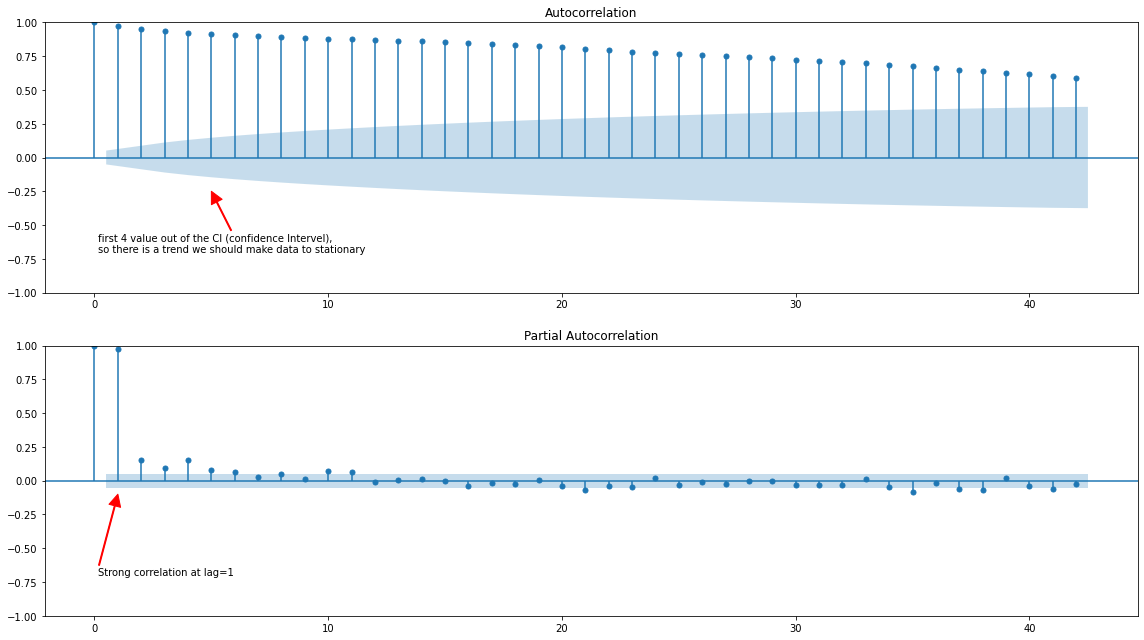

In [3]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 9))

plot_acf(df['y'], lags=42, ax=ax[0])
plot_pacf(df['y'], lags=42, ax=ax[1], method='ols')

decision = '''first 4 value out of the CI (confidence Intervel), 
so there is a trend we should make data to stationary'''

ax[0].annotate(decision, xy=(5, -0.25),
            xytext=(0.17, -0.7), arrowprops=dict(color='red', width=1))
ax[1].annotate('Strong correlation at lag=1', xy=(1, -0.1),
            xytext=(0.17, -0.7), arrowprops=dict(color='red', width=1))

plt.tight_layout(h_pad=2)
fig.savefig('../Images/acf_pacf_mean_temperature.png')
plt.show()